## EDA da classificação
Agora vamos visualizar como o algoritmo classificou as instancias

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# plt.style.use('ggplot')
sns.set(style="white", color_codes=True)

In [107]:
from os import listdir
from os.path import isfile, join

tweetsPath = '04_output/dec_tree/'
onlyfiles = [f for f in listdir(tweetsPath) if isfile(join(tweetsPath, f))]

In [108]:
dfList = list()
for file in onlyfiles:
    tweetsDF = pd.read_csv(tweetsPath + file)
    
    dfList.append(tweetsDF.drop(labels=["Unnamed: 0"], axis=1))

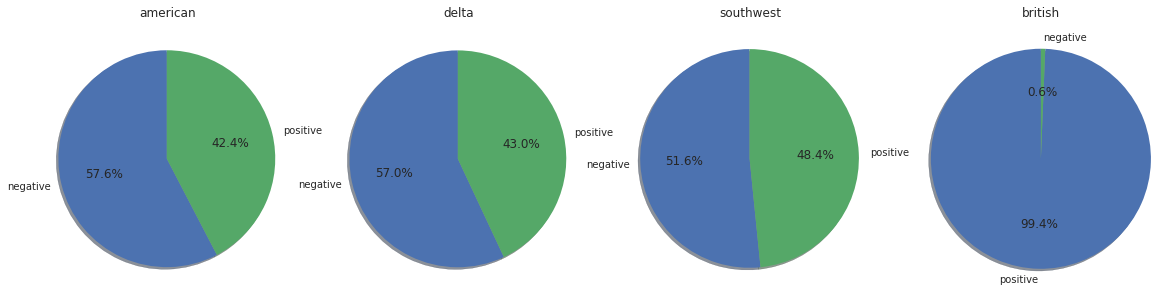

In [109]:
fig1, ax1 = plt.subplots(1, len(dfList), figsize=(20,5))
# labels = ['negative', 'positive']
# explode = (0.1, 0)

for i in range(len(dfList)):
    dfList[i]['sentimentName'] = dfList[i]['sentiment'].apply(lambda x: 'negative' if x==0 else 'positive')
    sentimentCounter = dfList[i]['sentimentName'].value_counts()

    labels = dfList[i]['sentimentName'].unique()
    _ = ax1[i].pie(sentimentCounter, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    _ = ax1[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    _ = ax1[i].set(title = onlyfiles[i].split("_")[0])

_ = plt.show()

In [94]:
from wordcloud import WordCloud, STOPWORDS

(-0.5, 2999.5, 2499.5, -0.5)

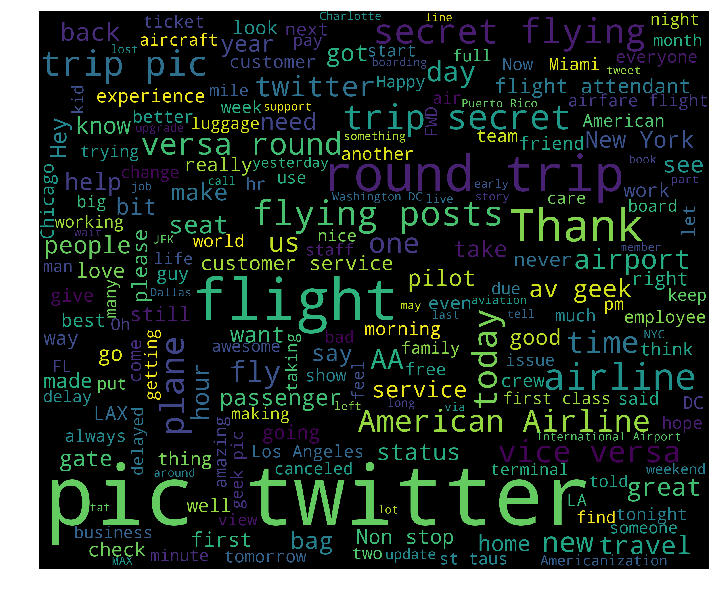

In [95]:
i = 0
df =  dfList[i][ dfList[i]["sentimentName"]=='negative']
words = ' '.join(df["correctedText"])
cleanedWord = " ".join([w for w in words.split()
                            if "http" not in w
                            and not w.startswith("@")
                            and w != "RT"
                       ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleanedWord)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()